In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fresco.potentials import NUwNU
from fresco.optimize import LBFGS_CPP
from fresco.utils import export_structure

In [2]:
N = 10000         # Number of points
ndim = 2          # Dimensions
L = np.ones(ndim) # 1x1 square box
c = np.ones(N)    # relative weighting of points
x0 = np.random.random(N*ndim) # Random initial positions

In [3]:
K = 100             # Distance from center of peaks we are constraining
Npeaks = 5       # Number of peaks we are constraining
thetas = (np.arange(Npeaks)/Npeaks)*np.pi

# Create list of peak coordinates to constrain
Kvecs = np.vstack([np.cos(thetas),np.sin(thetas)]).T*K

In [4]:
# Create the array of structure factor values corresponding to the k-vectors to be constrained
Sk = np.ones(Kvecs.shape[0])*N

# Create the weighting function
wk = np.ones(Kvecs.shape[0])

In [5]:
loss = NUwNU(c,Kvecs.ravel(),Sk,wk,L) # Initialize loss function
minimizer = LBFGS_CPP(x0.ravel(), loss, iprint=100) # Initialize minimizer

In [6]:
# Run the minimization
minimizer.run(1000)
res = minimizer.get_result()
x = np.array(res.coords)

lbgs: 0 E 4.998710712550930e+00 rms 5.117832762130554e-04 nfev 2 step norm 4.448878436281571e-04
lbgs: 100 E 1.627424223411023e+00 rms 4.262684790443099e-04 nfev 109 step norm 4.922314887020112e-03
lbgs: 200 E 1.622098215622375e+00 rms 8.195118255478442e-05 nfev 286 step norm 1.575010136224632e-04
lbgs: 300 E 1.622100826806958e+00 rms 2.001257948183079e-04 nfev 471 step norm 1.090364293486565e-05
lbgs: 400 E 1.622096592923127e+00 rms 2.505643978139076e-04 nfev 655 step norm 6.474967730705567e-05
lbgs: 500 E 1.622015436412456e+00 rms 1.236095725031893e-04 nfev 840 step norm 6.145780374291411e-06
lbgs: 600 E 1.622019436449812e+00 rms 2.453303720322035e-04 nfev 988 step norm 1.851092194018390e-05
lbgs: 700 E 1.622038161423217e+00 rms 2.699860397061343e-04 nfev 1198 step norm 1.945486531317777e-05
lbgs: 800 E 1.621912900298336e+00 rms 4.702695837419492e-05 nfev 1392 step norm 8.293760459498161e-06
lbgs: 900 E 1.621954817480584e+00 rms 1.607013162596391e-04 nfev 1588 step norm 6.88271049027

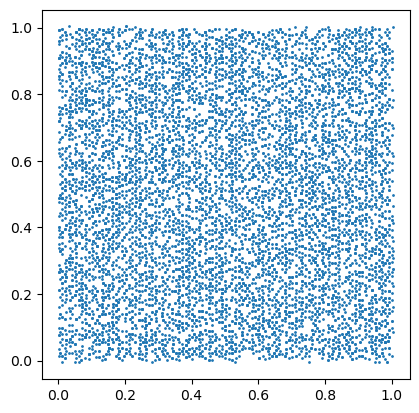

In [8]:
points = x.reshape(-1,ndim)

fig = plt.figure()
ax = fig.gca()
ax.scatter(points[:,0], points[:,1], s=1)
ax.set_aspect('equal')
plt.show()

Current # points: 10000
Remaining points after enforcing box bounds: 9933
Remaining points after removing overlaps: 5664


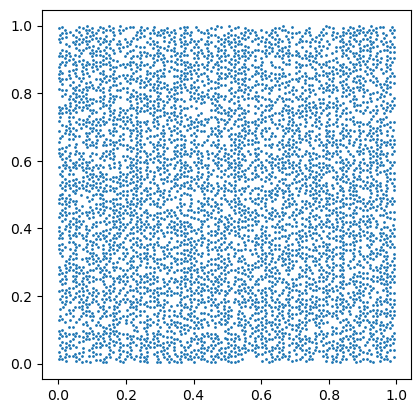

In [9]:
print("Current # points: "+str(points.shape[0]))

# Remove points outside the desired box boundary
idx = np.nonzero(np.prod((points>=0)*(points<1),axis=-1))
points = points[idx]
print("Remaining points after enforcing box bounds: "+str(points.shape[0]))

# Remove points that are highly overlapping
dist = 0.1/K
i = 0
while i < points.shape[0]:
    dr = np.linalg.norm(points-points[i].reshape(1,-1),axis=-1)
    idx = np.nonzero((dr>dist)+(np.arange(points.shape[0])<=i))
    points = points[idx]
    i+= 1
print("Remaining points after removing overlaps: "+str(points.shape[0]))

fig = plt.figure()
ax = fig.gca()
ax.scatter(points[:,0], points[:,1], s=1)
ax.set_aspect('equal')
plt.show()

In [10]:
points = np.vstack([points,np.random.random((N-points.shape[0],ndim))])
minimizer = LBFGS_CPP(points.ravel(), loss, iprint=100) # Initialize minimizer
minimizer.run(1000)
res = minimizer.get_result()
x = np.array(res.coords)

lbgs: 0 E 2.981515876672026e+00 rms 8.519659888421960e-03 nfev 2 step norm 1.000000000000000e-01
lbgs: 100 E 1.664027651364784e+00 rms 1.728169968822731e-04 nfev 118 step norm 1.040091791495380e-04
lbgs: 200 E 1.663994279367038e+00 rms 2.237002998605018e-04 nfev 247 step norm 1.321177371129399e-04
lbgs: 300 E 1.663952416838584e+00 rms 1.659856606727982e-04 nfev 374 step norm 3.797456806376373e-05
lbgs: 400 E 1.663929804062297e+00 rms 1.251029702340921e-04 nfev 540 step norm 6.386283555276032e-05
lbgs: 500 E 1.663944199893207e+00 rms 1.615298267119290e-04 nfev 698 step norm 9.127459541108899e-06
lbgs: 600 E 1.663903641501262e+00 rms 5.749418202745993e-05 nfev 828 step norm 4.372413002510692e-08
lbgs: 700 E 1.663928843028222e+00 rms 1.607513124202052e-04 nfev 950 step norm 2.067620533326980e-05
lbgs: 800 E 1.663904256956245e+00 rms 1.198057650886941e-04 nfev 1125 step norm 7.667597620238730e-06
lbgs: 900 E 1.663883184656800e+00 rms 5.621027440541678e-05 nfev 1288 step norm 8.198662082557

Current # points: 10000
Remaining points after enforcing box bounds: 9970
Remaining points after removing overlaps: 6693


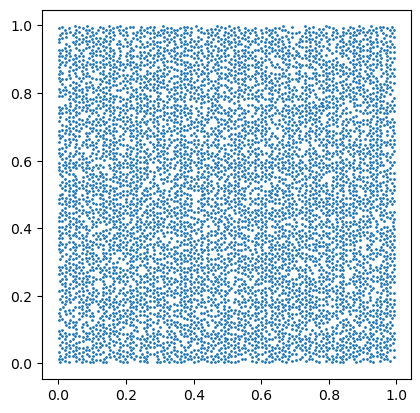

In [11]:
points = x.reshape(-1,ndim)
print("Current # points: "+str(points.shape[0]))

# Remove points outside the desired box boundary
idx = np.nonzero(np.prod((points>=0)*(points<1),axis=-1))
points = points[idx]
print("Remaining points after enforcing box bounds: "+str(points.shape[0]))

# Remove points that are highly overlapping
dist = 0.1/K
i = 0
while i < points.shape[0]:
    dr = np.linalg.norm(points-points[i].reshape(1,-1),axis=-1)
    idx = np.nonzero((dr>dist)+(np.arange(points.shape[0])<=i))
    points = points[idx]
    i+= 1
print("Remaining points after removing overlaps: "+str(points.shape[0]))

fig = plt.figure()
ax = fig.gca()
ax.scatter(points[:,0], points[:,1], s=1)
ax.set_aspect('equal')
plt.show()

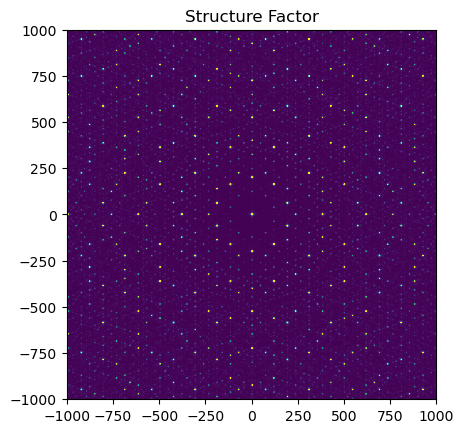

In [12]:
hamming = 0.54+0.46*np.cos(np.linalg.norm(points,axis=-1)*2*np.pi/np.sqrt(ndim))

Kspan = K*10 # extent to which we are calculating S(k)

q,S,Sk,r,g, gr = export_structure(points,L, Nk = Kspan, radii = hamming)

fig = plt.figure()
ax = fig.gca()
ax.imshow(Sk,vmin=0,vmax=100,extent=[-Kspan, Kspan, -Kspan, Kspan])
ax.set_title("Structure Factor")
plt.show()